<a href="https://colab.research.google.com/github/AhmedAkram392/Cross_Validation/blob/main/Stratified_Shuffle_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit to Kaggle, StackOverflow, and Youtube

# Kaggle Source Code

https://www.kaggle.com/code/viswanathanc/stratifiedshufflesplit-working-with-less-data/notebook

For StratifiedShuffleSplit, 'n_split' specifies the number of times the data needs to be sampled from each strata in the proportion mentioned in 'test_size'.

Example: Here's an example of a dataset containing 4 strata and each strata containing 3 records each. n_split=3 and test_size=0.3 gives:

Test data has one record from each strata and overall has about 30% records of the dataset, that is, 4 out of 12.

In [ ]:
---Example dataset---
df
​
ProductName Quantities
0   Mobile  20
1   Mobile  15
2   Mobile  12
3   PC  10
4   PC  8
5   PC  9
6   Tablet  5
7   Tablet  3
8   Tablet  4
9   RasPi   2
10  RasPi   1
11  RasPi   3


from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)

for train_index,test_index in split.split(df,df['ProductName']):
    split_train = df.loc[train_index]
    split_test = df.loc[test_index]
    print("train:")
    print(split_train)
    print("test:")
    print(split_test)

---split_1---
train:
   ProductName  Quantities
5           PC           9
8       Tablet           4
0       Mobile          20
9        RasPi           2
10       RasPi           1
4           PC           8
1       Mobile          15
7       Tablet           3
test:
   ProductName  Quantities
2       Mobile          12
3           PC          10
11       RasPi           3
6       Tablet           5
---split_2---
train:
   ProductName  Quantities
7       Tablet           3
3           PC          10
2       Mobile          12
8       Tablet           4
9        RasPi           2
11       RasPi           3
1       Mobile          15
5           PC           9
test:
   ProductName  Quantities
4           PC           8
0       Mobile          20
6       Tablet           5
10       RasPi           1
---split_3---
train:
   ProductName  Quantities
2       Mobile          12
9        RasPi           2
11       RasPi           3
3           PC          10
0       Mobile          20
6       Tablet           5
8       Tablet           4
4           PC           8
test:
   ProductName  Quantities
5           PC           9
7       Tablet           3
1       Mobile          15
10       RasPi           1 

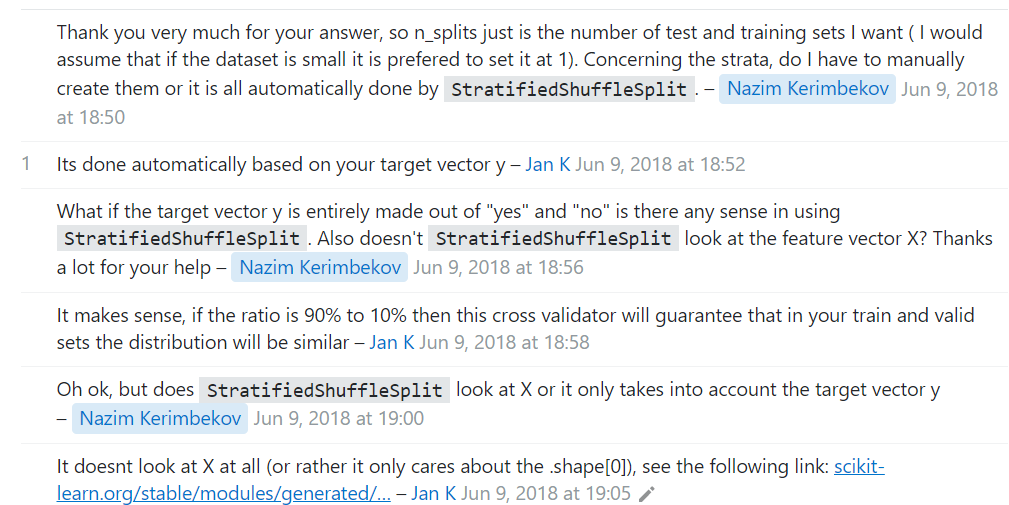

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([['ahmed','engineer','uk','rich'],
                   ['furqan','engineer','australia','rich'],
                   ['irfan','engineer','uk','rich'],
                   ['balu','engineer','australia','rich'],
                   ['sab','engineer','uk','rich'],
                   ['mai','engineer','uk','poor'],
                   ['Husnain','Labour','america','poor'],
                   ['kamal','engineer','uk','poor'],
                   ['hassan','engineer','uk','poor'],
                   ['kahl','engineer','uk','poor'],
                   ['amin','engineer','uk','poor'],
                   ['aslam','engineer','uk','poor'],
                   ['fahad','engineer','uk','poor'],
                   ['talha','engineer','uk','poor'],
                   ['raomail','engineer','uk','poor'],
                   ['hassan','engineer','uk','poor'],
                   ['kahkaifil','engineer','uk','poor']
                  ], columns = ['name','profession','living','status'])

When you are doing cross validation there are multiple ways you can do, first option is to train the model with all available data and test with same data makes no sense in terms of accuracy. Second option is that Split the 70% of  data into trainig set and 30% into test but the problem wit this set that there would be imbalanbce in classes in target variable and while training there will be more data belonging to one class as comparison to other class and it will biased the model with majority class and this wouldnot be the ideal solution. So the next option will be to split teh data in such a way that every class in tagert variable will be shared with equal proportion in both training and testing set.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

#The arguments inside the stratified shuffle split are test size that actually detremines the poercentage of data in train and test, n_splits will determine the number different training and 
#test we will create stratified in shuffle split will gurantees the equal propertion of classes shared between training and test
sss=StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.2)

#The code below will actually create the array of shape of rows in df with value False becasue of np.zeros if np.ones then it will generate True's, and np.bool_ is deprecate alias of bool,
#That is actually generating True and False
X=np.zeros(shape=df.shape[0],dtype=np.bool_)

y=np.array(df['status']) #prediction target

#Now the loop down belwo will actuall create the One array for training set from main data and one array for test set from main data keeping the percentage of split under consideration
#the most interesting factor here is it will generate the array of indexes that will be feed in form of list like we have done in the cell below
for train_index, test_index in sss.split(X, y):
    print(train_index, train_index.shape)
    print(test_index, test_index.shape)

In [ ]:
for train,test in split.split(X,y):     #this will splits the index
    #Now here what actually we are doing for example X contains all the data with features this algorithm will pick the indexes and make an array 1D or list will feed all the elements in #
    #X.iloc[rows,column] we will pass all the elements in terms of  array
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]